# 2D Laplace Equation Numerical Solution

In this Jupyter Notebook we will solve Laplace's Equation for a certain set of boundary conditions using a numerical method, rather than by separation of variables.

The question we want to solve is 3.20 from Griffith's Introduction to Electrodynamics - see the example here: 


Two infinitely-long ground metal plates are connected by metal strips maintained by a constant potential, as shown in Fig. 3.20 (a thin layer of insulation at each corner prevents them from shorting out). Find the potential inside the resulting rectangular pipe. (See diagram at link https://peppyhare.github.io/r/notes/griffiths/ch3-3/)

This problem requires us to solve the 2-D Laplace equation to calculate the potential V, and we will do it using the Method of Relaxation.



Firstly, we want to decribe the physical dimensions of our problem. We are interested in the potential inside a square pipe, which extends out to infinity in the z direction. Our potential will therefore only be a function of x and y. Let's say we take 100 points, each a distance delta =1 apart in each dimension. These points could span 5 metres, or 5 centimetres, at the end of the day it doesn't matter much. One we have the number of points in each dimension, the mesh grid command will make a lenX x lenY grid of points.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set Dimension and delta
lenX = 100
lenY = 100 
delta = 1 #delta should be an integer (you will see later)

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))



The next thing we want to do is tell the code our boundary conditions. You all have been given unique ones. Here top and bottom refer to your y conditions, left and right the x ones. See Example 3.4 and Figure 3.20 in the textbook. I have chosen to set V_0 = 2.


In [2]:
Vtop = 0
Vbottom = 0
Vleft = 2
Vright = 2

--------------------
We now need to make a guess for the potential inside the box. This value is just a starting estimate, and we will set our potential at all points inside our pipe to be equal to this number initially. The values on the edges will be set to the boundary conditions you supplied above.

Set Vguess = 0.1. Run the cell.

In [3]:
# Initial guess of interior grid
Vguess = 0.1

# Set array size and set the interior value with Vguess
V = np.empty((lenX, lenY))
V.fill(Vguess)

# Set Boundary condition
V[(lenY-1):, :] = Vtop
V[:1, :] = Vbottom
V[:, (lenX-1):] = Vright
V[:, :1] = Vleft


Now tell the code the maximum number of iterations you would like to run. The more you run the better your final answer will be, but the code will take longer to run. Let's try 100 iterations to begin.



In [16]:
# Set maximum iteration
maxIter = 1000


Now the magic really happens! The "method of relaxation" when applied to the Laplace equation is a numerical technique to solve the equation iteratively by repeatedly updating the values at each grid point in a domain, gradually bringing them closer to the true solution by setting each point's value to the average of its neighboring points, essentially "relaxing" the initial guess towards the correct solution at the boundaries; this process is repeated until the solution converges to a stable state.

The code below implements this in two dimensions.

In [17]:
# Iteration (We assume that the iteration is convergence in maxIter = 500)
print("Please wait for a moment")
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            V[i, j] = (1/4) * (V[i - 1][j] + V[i + 1][j] + V[i][j - 1] + V[i][j + 1])

print("Iteration finished")

Please wait for a moment
Iteration finished



There we have it! You should now have a fully functional two-dimensional Laplace's equation solver! All that's left to do is to make a plot of our potential.


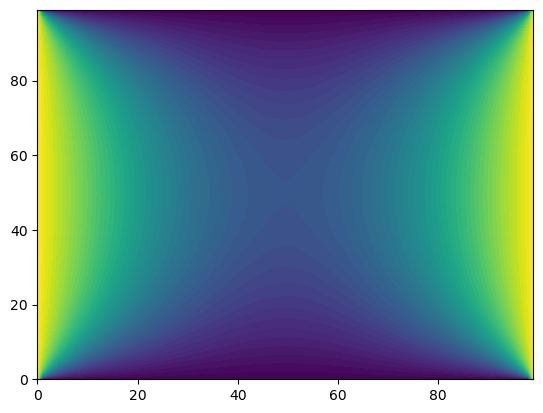

In [18]:
# Set colour interpolation and colour map.
# You can try set it to 10, or 100 to see the difference
# You can also try: colourMap = plt.cm.coolwarm
colorinterpolation = 50
colourMap = plt.cm.viridis


# Make the plot
plt.title("")
plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)

plt.show()



We can do a little bit better than that though. Add the following to your plot:

Add a title  
Add an x-axis label    
Add a y-axis label   
Include the colorbar and colorbar label  
Add some code to save your plot as a .png or .jpeg.    


You can add a new cell below this one by selcting Insert > add cell below, and then copy your previous plotting code and making the necessary edits. I have included a blank one for you.

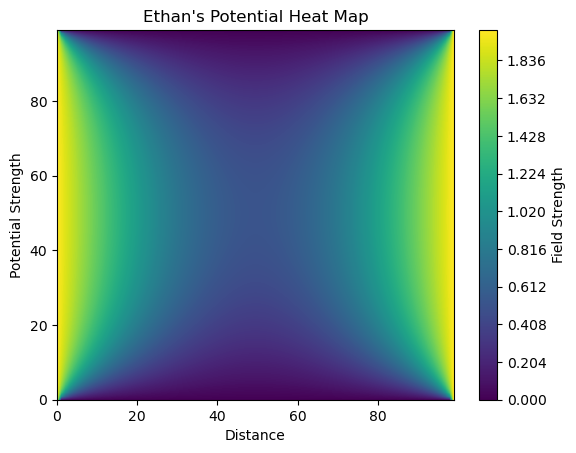

In [23]:
# Set colour interpolation and colour map.
# You can try set it to 10, or 100 to see the difference
# You can also try: colourMap = plt.cm.coolwarm
colorinterpolation = 500
colourMap = plt.cm.viridis


# Make the plot
plt.title("")
plt.contourf(X, Y, V, colorinterpolation, cmap=colourMap)
plt.xlabel("Distance")
plt.ylabel("Potential Strength")
plt.title("Ethan's Potential Heat Map")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Field Strength')
plt.savefig("2D_HMap.png")
plt.show()



One final fancy thing we can do is make a 3d surface plot. 


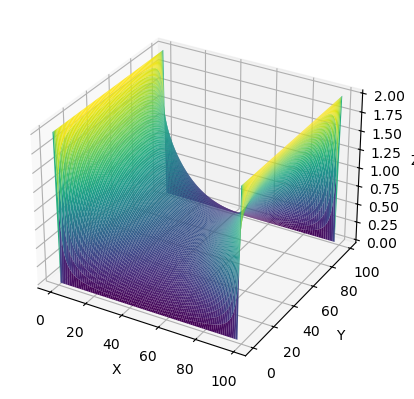

In [19]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, V, rstride= 1, cstride= 1, cmap='viridis', edgecolor='none');

ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
#ax.savefig("out.png")

# Show the result in the plot window
plt.show()

If you are interested, have a go at changing your values of maxIter and Vguess and see what happens to your solution!


# References


I wrote a much more extensive version of this over 3 years ago and can't remember the references, but it was largely my own!